# MTH 538 Project Report- Sayantan Sarkar

# Time-dependent Schroedinger equation: Qantum-Mechanical scattering experiments of a particle hitting a barrier. 

# Introduction

"In the beginning, God said, the four dimensional divergence of an anti-symmetric second rank tensor equals zero, and there was light." - Michio Kaku 


Schrodinger Equation is probably one of the most imporatant equations ever originated from the electric pulses of human neurons. 
In this present project the One Dimensional Schrodinger Equation is treated with tools from Numerical Method and the results are plotted by using the Python which is actually a reproduction of the classical paper- __Computer-Generated Motion Pictures of One-Dimensional Quantum Phenomena__ by __Goldberg, Schey and Schwarz__ [Am. J. Phys. 35, 177 (1967)].

# Theoretical Basics:

The one dimensional Quantum Mechanical scattering is described by the following P.D.E.:\
$$-\frac{\hbar^{2}}{2m}\frac{\partial^{2}}{\partial x^{2}}\psi(x,t)-V(x)\psi(x,t) = i\hbar\frac{\partial \psi}{\partial t}............(1)$$

Where, $\psi(x,t)$ is called the wave function and $|\psi(x,t)|^2$ denotes the probability density of a particle. $V(x)$ is the potential, $\hbar$ is the modified Plank's constant and $m$ is the mass of the particle.

<b>Here the equation is solved by the Crank-Nicolson Method.<b> 


<b>We work in a system where<b> $m=\frac{1}{2}$ and $\hbar = 1$ which simplifies the given equation as $$-H\psi=\left[\frac{\partial^{2}}{\partial x^{2}}-V(x)\right]\psi(x,t) = -i\frac{\partial \psi}{\partial t}............(2)$$

Now, the Crank–Nicolson stencil for a 1D problem is

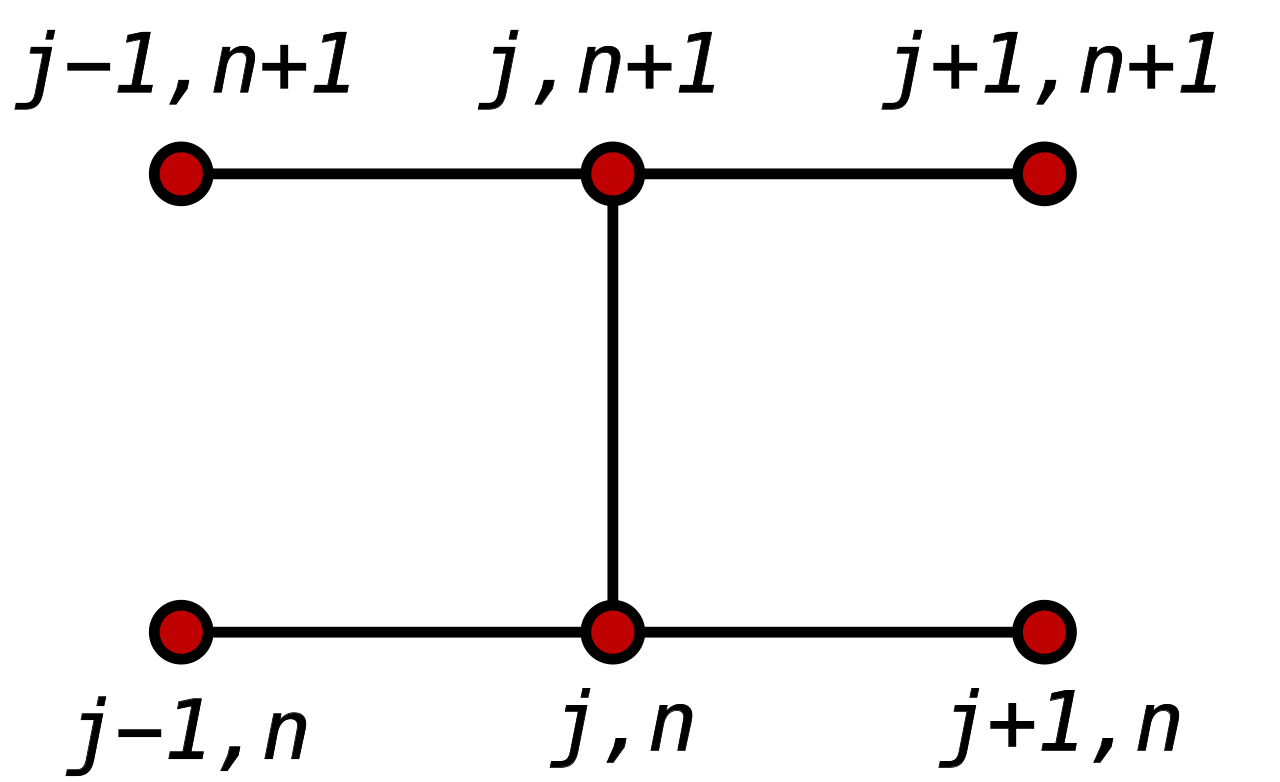

To deploy the CN scheme, we denote the
time by superscript $n$ and spatial position
by a subscript $j$, i.e. $$\psi(x, t) \rightarrow \psi_{j}^{n}$$
where $x_{j}= x_{j-1}+h=jh,\:h \text{, being the mesh length  }$ and $j = 0,\;1,\;2,\cdots,L$
and $t^{n}=t^{n-1}+k = k n,\;k-\text{being time step}$ and $n = 0,\;1,\;2,...$\
Using the Crank-Nicolson Scheme we finally get:
$$\mathbf{\psi_{j+1}^{n+1}+(i\lambda-h^2 V_j-2)\psi_{j}^{n+1}+\psi_{j-1}^{n+1}=-\psi_{j+1}^n + (i\lambda + h^2 V_j+2)\psi_{j}^n - \psi_{j-1}^n};\;\;\left[\lambda=\frac{2h^2}{k}\right]\cdots\cdots(5)$$ 
This equation is Unitary (as it has to be as unitary is the characteristic of wave equation) but implicit.
Let, $L = 1 = T$ 

__The Boundary Conditions:__
    
We imagine that the physical system with which the we work is situated in large 1D box of length $L$ and the wave functions must vanish at the walls or mathematically, $$\psi(0,t)=\psi(L,t)=0\;,\;\;\text{for all } t \text{ and }L=1$$
__Then, the boundary conditions are: $\mathbf{\psi_{0}^n=0 = \psi_{J}^n}$__
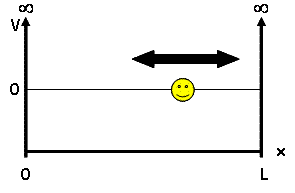
    

__The Initial Conditions:__ 
    
 Our main approach to the physical interpretation of this problem is to follow the time development of a wave packet as it moves into and out of a region of a potential. This initial wave packet can be chosen as by a Gaussian wave packet. We put a Gaussian wave packet centered about $x=x_{0}$ with a spread in $x$ governed by $\sigma_{0}$ as, $\psi(x,0)= e^{ik_{0}x}e^{\frac{-\left(x-x_{0}\right)}{2\sigma_{0}^2}}$.\\
Here, $e^{ik_{0}x}$ is a factor which ensures that our initial wave function move to the right with average momentum $k_{0}$.\\
Now, $x_{0}$ and $\sigma_{0}$ must be chosen so that $\psi(0,0)=0=\psi(L,0)$.\\
If we choose, $\sigma_{0}=\frac{L}{20}$ and $x_{0}=\frac{L}{4}$ we find $|\psi(0,0)|= e^{-12.5}\lesssim 4\times10^{-6}$, which does not produce any perceptible error when approximate as zero.\\
But still we need to impose two more restrictions so that the above box normalization do not give rise to difficulties.

__Some Restrictions__\
__Restriction-1:__ The box must not be allowed to travel so far that it hits the walls. We ensure that by the center of the packet move no further to the right than $x= \frac{3L}{4}$. This is accomplished by letting the average velocity $v_{0}=2k_{0}=\frac{L}{2T}$, here, $T=N\delta$ is the total time required by the packet to move from center to $\frac{3L}{4}$.\\
Also,$2k_{0}\approx \frac{J\epsilon}{2N\delta}=\frac{J\lambda}{4N\epsilon}$
where, $\lambda=\frac{2\epsilon^2}{\delta}$. With this set up we utilize approximately only the center half of the available space, omitting the outer space, omitting the outer quarters , and the packet is thus prevented from reaching the walls. \
__Restriction-2:__ We must arrange the system in a way that the reflected and transmitted packets continue to be well enough localized so that at the end of the event they are out of the region of the potential and still far from the wall. So, after a time $T$ the spread is given by $\sigma^2=\sqrt{\left(\sigma_{0}^4+4T^2\right)}=\sqrt{\left(\sigma_{0}^4+\frac{16N^2 \epsilon^4}{\lambda^2}\right)}$
This choice keeps the spread controlled in a required state.\\

__Some Additional Restrictions:__ We changed the continuous variable $x$ by discrete index $j$ so there are some additional limitations on the choice of input parameters. They are:
__Largest Wave Number:__ If $k_{max}$ is the largest wave number then,
$$k_{max}= \frac{\pi}{\epsilon}$$
__Largest Momentum:__ If $K_{m}$ is the largest momentum, then we have,$$\frac{k_{m}^2 \epsilon^2}{12}\ll1$$
__Maximum Potential $V_{max}$:__$$\frac{V_{max}\epsilon^2}{12}\ll1$$
__Average Energy $k_{0}$:__ $$\frac{N\delta^3(k_{m}^{6}-k_{0}^6)}{12}\ll1$$
Now, we can figure out the algorithm of our implication.

Let, $V_{j}h^2 +2 = \sigma$


# Computational Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact  
import cmath

In [3]:
L = 1
M = 500
h = L/M
T = 1
N = 2000
k = T/N
lmd = 2*h**2/k
#k0 = L*lmd/8*N*h
k0 = 200
x = np.linspace(0,L,M+1)
j = 0+1.j
def V(x):
    v = np.zeros_like(x)
    v[(x > 0.4) & (x < 0.5)] = 1e12
    return v
    
sigma =  V(x)[1:-1]*h**2 + 2

    
def l(t):
    return 0*t
def r(t):
    return 0*t
def f(x):
    return np.exp(j*k0*x)*np.exp((-(x-L/4)**2)/(2*L**2/400))
A = np.zeros((M-1,M-1), dtype = complex)
I = np.arange(M-1)
A[I,I] = j*lmd - sigma     # set the main diagonal
A[I[1:],I[:-1]] = 1 # set the subdiagonal
A[I[:-1],I[1:]] = 1


w = f(x)  
wa = np.zeros((M+1,N+1),dtype = complex)  # place to store values entire grid
wa[:,0] = w 
#plt.plot(x,np.real(wa[:,0]))
#assert (0)
for n in range(N):
    # update w
    oldt = k*n
    newt = k*(n+1)
    b = (j*lmd + sigma)*w[1:-1] 
    b += -w[2:]
    b += -w[:-2]
    #display(b.shape)
    w[1:-1] = np.linalg.solve(A,b)
    w[0]  = l(newt)
    w[-1] = r(newt)
    wa[:,n+1] = w
    #if n >100 :break
def plotframe(n):
    plt.figure(figsize=(16,8))
    plt.plot(x,np.real(wa[:,n]),'r')
    plt.plot(x,np.imag(wa[:,n]),'g')
    plt.plot(x,np.abs(wa[:,n]),'b')
    plt.plot(x,-(np.abs(wa[:,n])),'cyan')
    plt.xlim(0,1)
    plt.ylim(-2,2)
    plt.title('Schrodinger Equation at, t ='+str(round(k*n,3)))
    
nmax = n
interact(plotframe,n=(0,nmax)); 


interactive(children=(IntSlider(value=999, description='n', max=1999), Output()), _dom_classes=('widget-intera…

Text(0.5, 1.0, 'Probability Density at V=1e12')

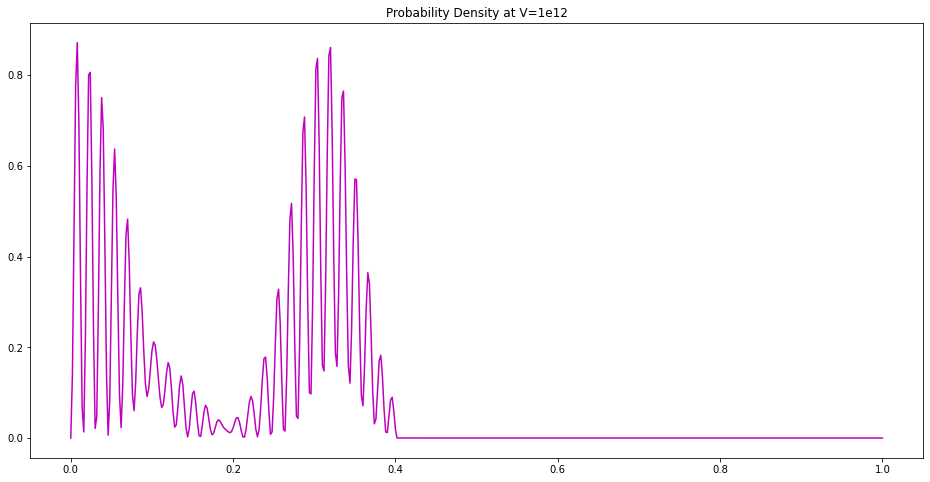

In [4]:
plt.figure(figsize=(16,8))
plt.plot(x,((np.abs(wa[:,n]))**2),'m')
plt.title('Probability Density at V=1e12')

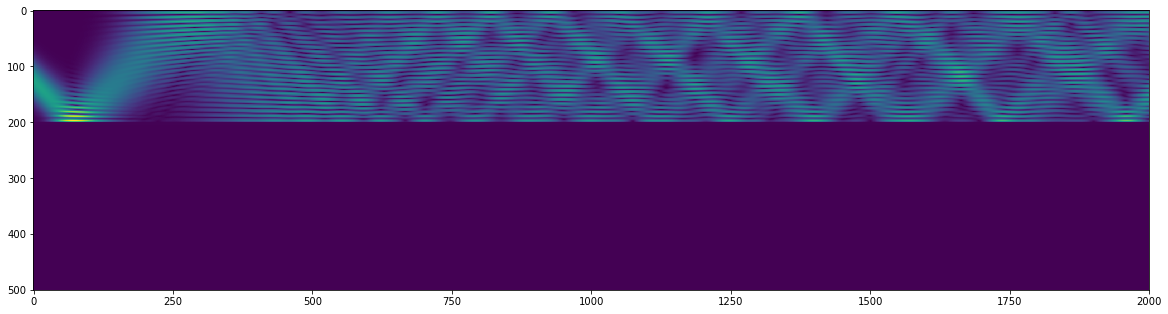

In [5]:
plt.figure(figsize=(20,16))
plt.imshow(np.abs(wa),interpolation = 'nearest')

# Results and Discussions:

__(1)__ When we use a very high value of V (here $10^{12}$) at $[0.4,0.5]$ we find that the probability density becomes zero beyond the point $x = 0.4$ __(Potential Barrier)__. That is this high potential hinders the motion of the charged particle.

__(2)__ When we reduce the value of V to $10^{3}$ or $10^{4}$ at $[0.4,0.5]$ we find that the quantum tunnelling effect is happening.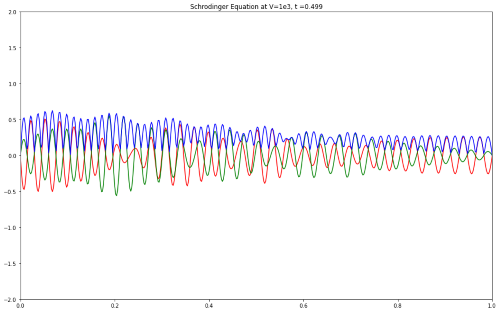



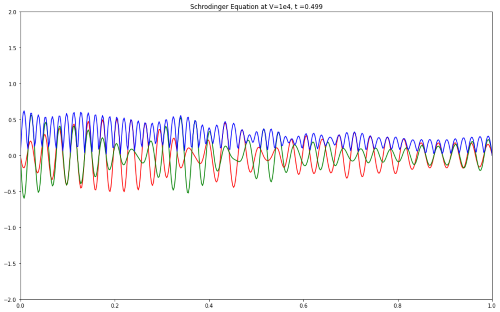

__(3)__ This quantum tunnelling slightly happens for $V = 10^{6}$ but it keeps on decreasing.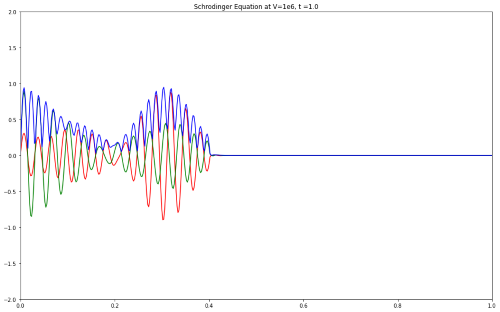

__(4)__ Probability density curve for $V=10^{3}$ and $V=10^{6}$ again verifies the validity of previous argument on quantum tunnelling. 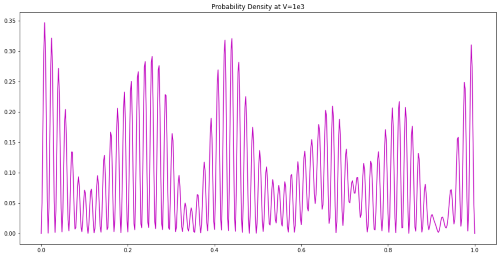

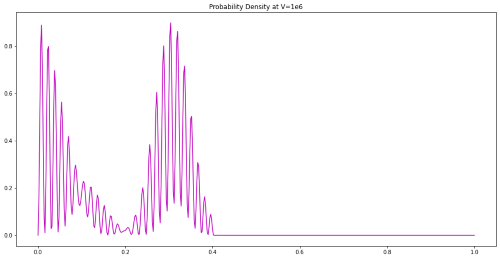

__(5)__ Now the color maps for $V = 10^{3}$ and $V = 10^{6}$ again supports the theory.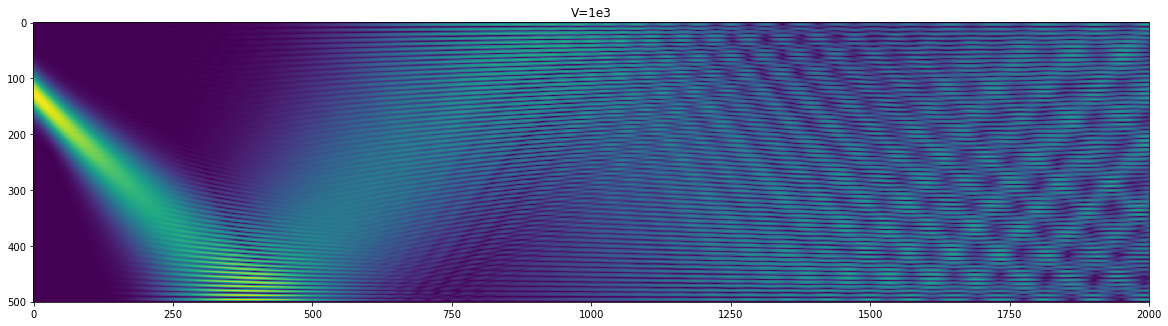

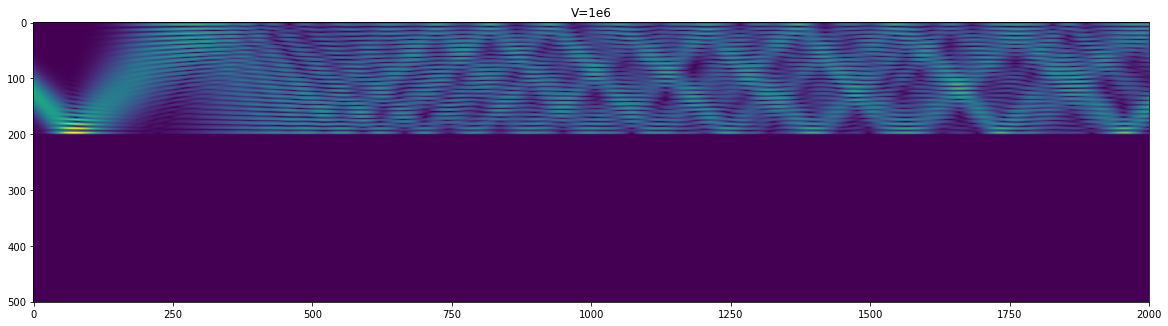

<span class="girk">These are nice pictures! Would love to see an intermediate value of V too.</span>

Overall this study here reproduces main results of the classical paper mentioned above with some different insights of the result.

# Acknowledgement:


I wish to convey my hearty gratitude to Prof. Ringland (no flattering). He was the one who made me break my stiffness towards the programming and made the topic numerical analyis more interesting to me.\
Also, I have always had immense interest for Mathematical and Theoretical Physics and Quantum Mechanics is my love. Thanks to Prof. Ringland again for convincing me to work on this project, I got to learn a whole new bunch of things (and also known things in an excellent way).\
I owe the always smiling, tech-savvy genius a lot. Hope, someday I can be like him in terms of dedication, determination and excellence.
(But, none of these, I swear again is any way flattering, I simply am being honest with the acknowledgement paragraph for the first time as I am writing my words for gratitude for the only person for whom I want to).\
I also thank my parents and my best friend plus lover Megha Sirkar for their constant love and care (even from 16,000 km away). \
Also, I would like to thank my friends- Joshua Lawson and Chanon Thongprayoon for their support and friendship.

# References:


__(1)__ Computer-Generated Motion Pictures of One-Dimensional Quantum Phenomena by Goldberg, Schey and Schwarz [Am. J. Phys. 35, 177 (1967)].\
__(2)__ Dr. (Prof.) Ringland's class notes and code on Crank-Nicolson Method (http://blue.math.buffalo.edu/538/day19_heat_equation_implicit.html). \
__(3)__ Introduction to Quantum Mechanics (2nd Edition) 2nd Edition by David J. Griffiths, by Cambridge University Press\
__(4)__ Introduction to Numerical Programming by Titus Adrien Beu, CRC Press.

<span class="girk">Nice job. Computationally sound and well presented.</span>